# Epsilon figures

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import haversine_distances
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import BallTree
import math

In [2]:
# multiplier to convert to km (from unit distance)
r_km = 6378.137 # 6371 

In [3]:
pwd

'/efs/home/jupyter-raffo/research/toolpaper'

# Figures only

(based on pre-computed files form below)

## Map plot 2003 patents

In [4]:
figdf = pd.read_csv('plots/map_pats03/map_pats03.csv')

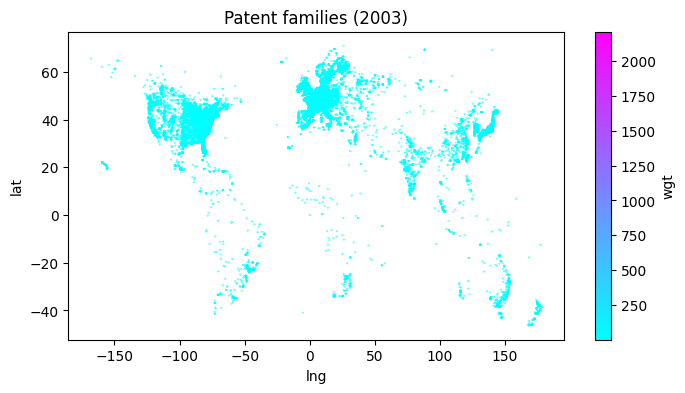

In [5]:
figdf.plot(x="lng", y="lat", kind="scatter", s=.1, figsize=[8,4], title='Patent families (2003)', c='wgt',colormap='cool')
plt.savefig('plots/map_pats03/map_pats03.png')

## Map plot 2013 patents

In [6]:
figdf = pd.read_csv('plots/map_pats13/map_pats13.csv')

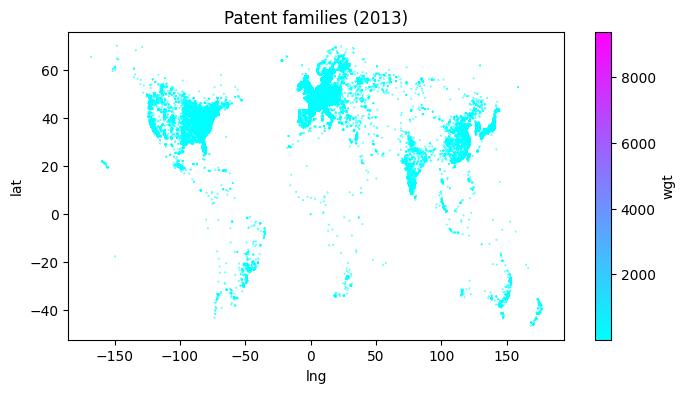

In [7]:
figdf.plot(x="lng", y="lat", kind="scatter", s=.1, figsize=[8,4], title='Patent families (2013)', c='wgt',colormap='cool')
plt.savefig('plots/map_pats13/map_pats13.png')

## Min distance (Epsilon) distribution over time

In [8]:
figdf = pd.read_csv('plots/disteps_pats0313/disteps_pats0313.csv', index_col=0)
figdf.head()

,2013,2003
0.00,0.000629,0.000638
0.01,0.008297,0.008133
0.02,0.014281,0.013687
0.03,0.022264,0.020073
0.04,0.029240,0.027142


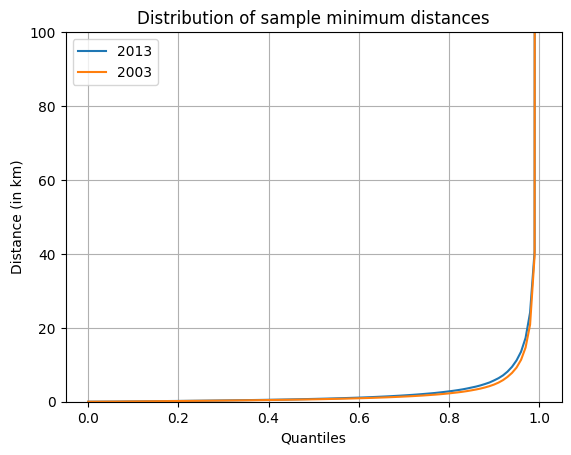

In [9]:
figdf.plot()
plt.title('Distribution of sample minimum distances')
plt.grid(True)
plt.xlabel('Quantiles')
plt.ylim((0,100))
plt.ylabel('Distance (in km)')
plt.savefig('plots/disteps_pats0313/disteps_pats0313.png')
plt.show()

## Min distance (epsilon) distribution over 35 tech fields

In [10]:
figdf = pd.read_csv('plots/disteps_pats35tecs/disteps_pats35tecs.csv', index_col=0)
figdf.head()

,2013,2003,3220,3324,3419,4230,2113,0,5135,5233,...,1202,1305,2112,4232,5234,4126,3417,3323,4128,3222
0.00,0.000629,0.000638,0.000732,0.000754,0.000635,0.000694,0.000754,0.000754,0.000694,0.001405,...,0.000680,0.000694,0.000754,0.000694,0.000916,0.001405,0.001441,0.000754,0.001465,0.008213
0.01,0.008297,0.008133,0.014229,0.013143,0.011132,0.016901,0.011132,0.011132,0.011278,0.011214,...,0.011132,0.014962,0.011132,0.011132,0.012542,0.014071,0.014071,0.011132,0.014071,0.025841
0.02,0.014281,0.013687,0.027449,0.025747,0.022343,0.033396,0.020125,0.021753,0.025748,0.020394,...,0.017212,0.029287,0.019215,0.020010,0.025629,0.027510,0.026409,0.022264,0.027059,0.041062
0.03,0.022264,0.020073,0.039029,0.036631,0.033624,0.052079,0.030131,0.034734,0.035552,0.035566,...,0.027898,0.042379,0.029542,0.030155,0.038599,0.042483,0.035552,0.035150,0.039622,0.048330
0.04,0.029240,0.027142,0.060947,0.066579,0.042666,0.088349,0.039338,0.051039,0.046064,0.054788,...,0.035835,0.057306,0.041739,0.044537,0.060539,0.066072,0.047923,0.044312,0.056292,0.088427


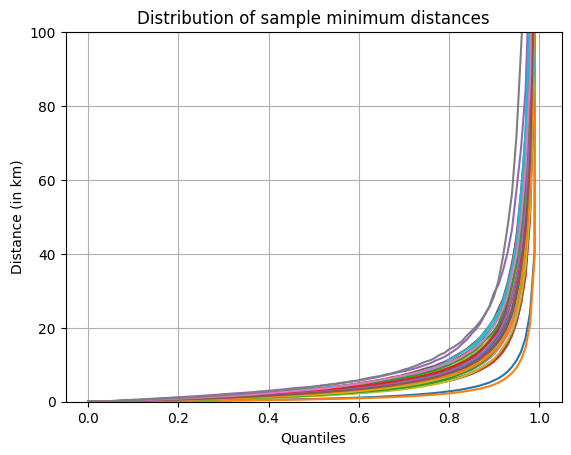

In [11]:
figdf.plot()
plt.title('Distribution of sample minimum distances')
plt.grid(True)
plt.xlabel('Quantiles')
plt.ylim((0,100))
plt.ylabel('Distance (in km)')
legend = plt.legend([])
legend.remove()
plt.savefig('plots/disteps_pats35tecs/disteps_pats35tecs.png')
plt.show()

## Min distance (Epsilon) distribution over time

In [12]:
figdf = pd.read_csv('plots/disteps_pats0313_13tecs/disteps_pats0313_13tecs.csv', index_col=0)
figdf.head()

,2013,2003
0.00,0.000629,0.000638
0.01,0.008297,0.008133
0.02,0.014281,0.013687
0.03,0.022264,0.020073
0.04,0.029240,0.027142


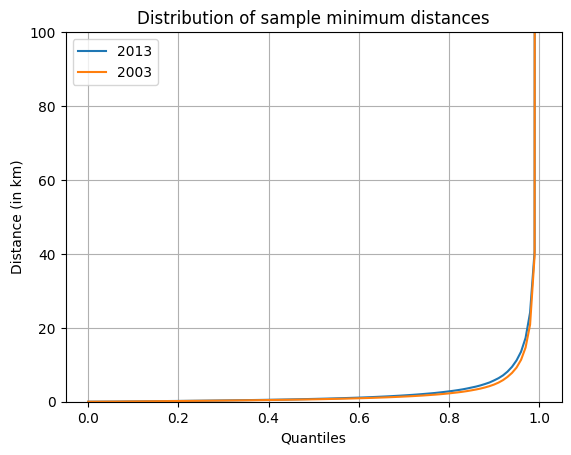

In [13]:
figdf.plot()
plt.title('Distribution of sample minimum distances')
plt.grid(True)
plt.xlabel('Quantiles')
plt.ylim((0,100))
plt.ylabel('Distance (in km)')
plt.savefig('plots/disteps_pats0313_13tecs/disteps_pats0313_13tecs.png')
plt.show()

## Min distance (epsilon) distribution over 13 subsector fields

In [14]:
figdf = pd.read_csv('plots/disteps_pats13tecs/disteps_pats13tecs.csv', index_col=0)
figdf.head()

,2013,2003,11,12,13,14,21,31,32,33,34,41,42,51,52
0.00,0.000629,0.000638,0.000666,0.000680,0.000629,0.000732,0.000666,0.000635,0.000694,0.000733,0.000635,0.001310,0.000669,0.000694,0.000694
0.01,0.008297,0.008133,0.011132,0.011132,0.008525,0.011132,0.008707,0.011132,0.011132,0.011132,0.011132,0.011132,0.011132,0.011278,0.011132
0.02,0.014281,0.013687,0.016348,0.017212,0.014453,0.019333,0.016029,0.024051,0.020299,0.019317,0.018970,0.020128,0.018614,0.025748,0.017739
0.03,0.022264,0.020073,0.026333,0.027898,0.023737,0.027954,0.027133,0.035319,0.030996,0.029426,0.028273,0.029448,0.028432,0.035552,0.029373
0.04,0.029240,0.027142,0.035041,0.035835,0.030152,0.035307,0.035131,0.048438,0.040580,0.038706,0.035773,0.042442,0.038089,0.046064,0.041048


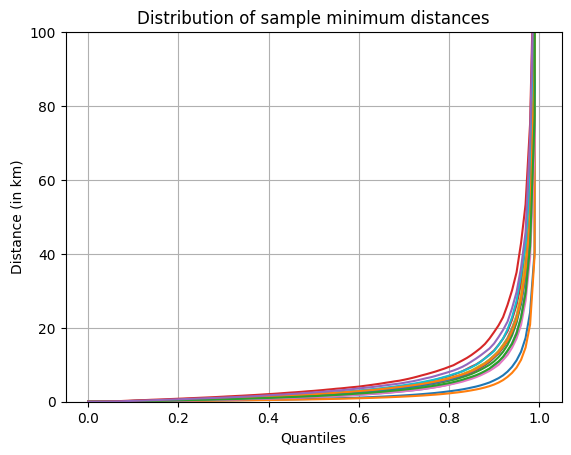

In [15]:
figdf.plot()
plt.title('Distribution of sample minimum distances')
plt.grid(True)
plt.xlabel('Quantiles')
plt.ylim((0,100))
plt.ylabel('Distance (in km)')
legend = plt.legend([])
legend.remove()
plt.savefig('plots/disteps_pats13tecs/disteps_pats13tecs.png')
plt.savefig('plots/resubmission/fig2a_eps_pats_time_tec.png')
plt.show()

## Min distance (epsilon) distribution over countries (13 subsector fields)

In [16]:
figdf = pd.read_csv('plots/disteps_patsCC/disteps_patsCC.csv', index_col=0)
figdf.head()

,JP,BR,AR,MX,ZA,FR,DE,SG,AU,GB,US,CN
0.00,0.001434,0.002226,0.270684,0.094722,0.011132,0.000732,0.000662,0.051400,0.004871,0.000629,0.001113,0.000803
0.01,0.010033,0.011132,0.270684,0.115793,0.013999,0.003232,0.011132,0.056313,0.025526,0.003473,0.008248,0.011132
0.02,0.013054,0.019513,0.304494,0.259463,0.060607,0.011883,0.027295,0.060251,0.027286,0.011324,0.011132,0.029026
0.03,0.017212,0.030208,0.306652,0.387491,0.108499,0.031374,0.045157,0.064871,0.028643,0.019624,0.013828,0.061289
0.04,0.021069,0.042818,0.355000,0.519018,0.166322,0.044823,0.063963,0.066055,0.035859,0.026404,0.014471,0.095795


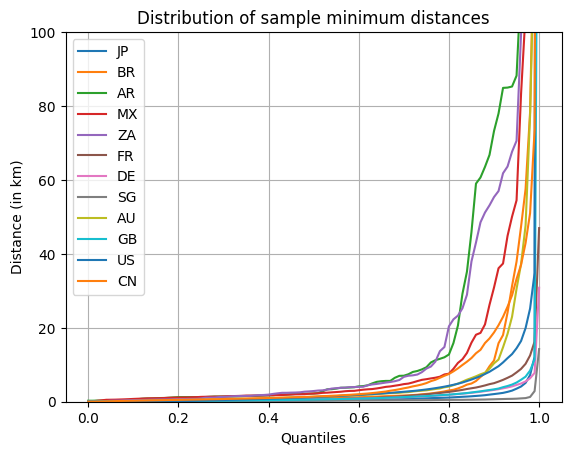

In [17]:
figdf.plot()
plt.title('Distribution of sample minimum distances')
plt.grid(True)
plt.xlabel('Quantiles')
plt.ylim((0,100))
plt.ylabel('Distance (in km)')
plt.savefig('plots/disteps_patsCC/disteps_patsCC.png')
plt.savefig('plots/resubmission/fig2c_eps_cc.png')
plt.show()

In [18]:
figdf = pd.read_csv('plots/disteps_patsCC/disteps_patsCCwgt.csv', index_col=0)
figdf.head()

,JP,BR,AR,MX,ZA,FR,DE,SG,AU,GB,US,CN
0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


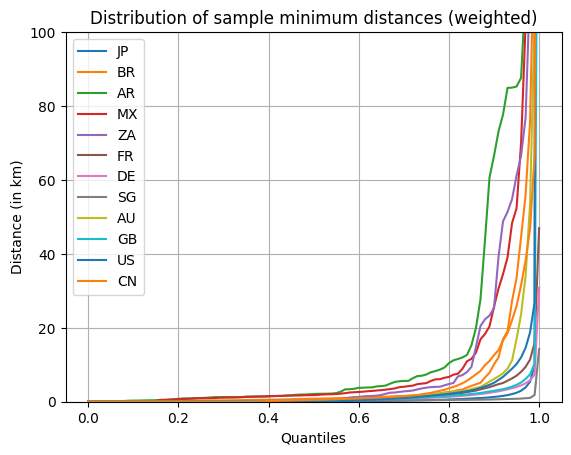

In [19]:
figdf.plot()
plt.title('Distribution of sample minimum distances (weighted)')
plt.grid(True)
plt.xlabel('Quantiles')
plt.ylim((0,100))
plt.ylabel('Distance (in km)')
plt.savefig('plots/disteps_patsCC/disteps_patsCCwgt.png')
plt.show()

## Map plot 2003 sci pubs

In [20]:
figdf = pd.read_csv('plots/map_pubs03/map_pubs03.csv')

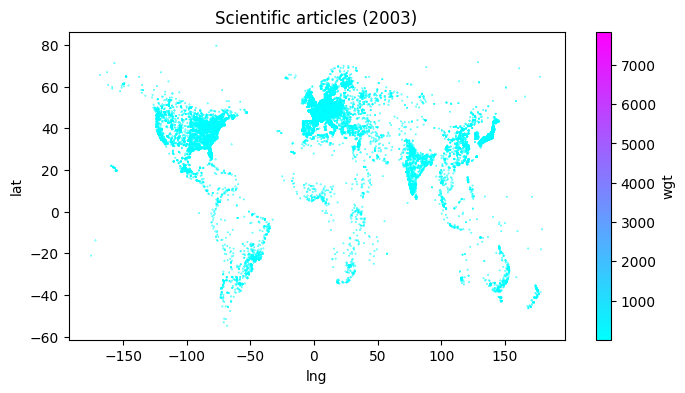

In [21]:
figdf.plot(x="lng", y="lat", kind="scatter", s=.1, figsize=[8,4], title='Scientific articles (2003)', c='wgt',colormap='cool')
plt.savefig('plots/map_pubs03/map_pubs03.png')

## Map plot 2013 sci pubs

In [22]:
figdf = pd.read_csv('plots/map_pubs13/map_pubs13.csv')

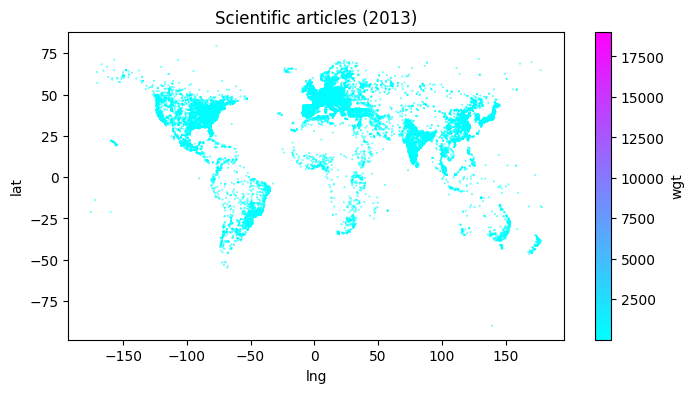

In [23]:
figdf.plot(x="lng", y="lat", kind="scatter", s=.1, figsize=[8,4], title='Scientific articles (2013)', c='wgt',colormap='cool')
plt.savefig('plots/map_pubs13/map_pubs13.png')

# Compute data and figures one-by-one

## Pats

In [11]:
df = pd.read_csv('ipf0313.csv')
df.head()

,year,lat,lng,tec,wgt,adminlat,adminlng,name,admin1,admin2,cc
0,2003,-46.40000,168.35001,1409,0.250000,-46.40000,168.35000,Invercargill,Southland,Invercargill City,NZ
1,2003,-46.40000,168.35001,3220,0.250000,-46.40000,168.35000,Invercargill,Southland,Invercargill City,NZ
2,2003,-46.23148,169.75117,3429,0.500000,-46.23389,169.75000,Balclutha,Otago,Clutha District,NZ
3,2003,-46.23148,169.75117,4125,0.500000,-46.23389,169.75000,Balclutha,Otago,Clutha District,NZ
4,2003,-46.13330,167.68300,4227,0.166667,-46.35000,168.01667,Riverton,Southland,Southland District,NZ


In [12]:
dfall = df[['year','lat','lng','wgt']].groupby(['year','lat','lng'],as_index=False).sum()
# dfall = dfall.drop(columns = ['tec'])
dfall.head()

,year,lat,lng,wgt
0,2003,-46.40000,168.35001,0.500000
1,2003,-46.23148,169.75117,1.000000
2,2003,-46.13330,167.68300,0.333333
3,2003,-46.09880,168.94600,0.333333
4,2003,-46.08330,168.05000,0.333333


In [13]:
for x in df, dfall:
    # round up wgts
    x['wgt']=x['wgt'].apply(np.ceil)
    # convert coords to radians 
    x['radlat']=np.deg2rad(x['lat'].values)
    x['radlng']=np.deg2rad(x['lng'].values)
    print(x.head())
    print('total wgts:', x.wgt.sum())
    # print('unwgt stats:', x.describe())

   year       lat        lng   tec  wgt  adminlat   adminlng          name  \
0  2003 -46.40000  168.35001  1409  1.0 -46.40000  168.35000  Invercargill   
1  2003 -46.40000  168.35001  3220  1.0 -46.40000  168.35000  Invercargill   
2  2003 -46.23148  169.75117  3429  1.0 -46.23389  169.75000     Balclutha   
3  2003 -46.23148  169.75117  4125  1.0 -46.23389  169.75000     Balclutha   
4  2003 -46.13330  167.68300  4227  1.0 -46.35000  168.01667      Riverton   

      admin1              admin2  cc    radlat    radlng  
0  Southland   Invercargill City  NZ -0.809833  2.938262  
1  Southland   Invercargill City  NZ -0.809833  2.938262  
2      Otago     Clutha District  NZ -0.806892  2.962717  
3      Otago     Clutha District  NZ -0.806892  2.962717  
4  Southland  Southland District  NZ -0.805178  2.926620  
total wgts: 1271325.0
   year       lat        lng  wgt    radlat    radlng
0  2003 -46.40000  168.35001  1.0 -0.809833  2.938262
1  2003 -46.23148  169.75117  1.0 -0.806892  2.

### Map plot 2003 patents

In [14]:
# !mkdir plots/map_pats03

In [15]:
dfall[dfall['year']==2003].to_csv('plots/map_pats03/map_pats03.csv', index=False)

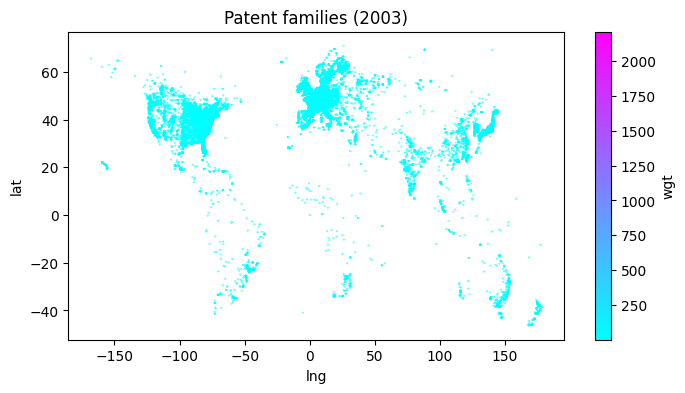

In [16]:
dfall[dfall['year']==2003].plot(x="lng", y="lat", kind="scatter", s=.1, figsize=[8,4], title='Patent families (2003)', c='wgt',colormap='cool')
# plt.savefig('plots/map_pats03/map_pats03.png')

### Map plot 2013 patents

In [17]:
# !mkdir plots/map_pats13

In [18]:
dfall[dfall['year']==2013].to_csv('plots/map_pats13/map_pats13.csv', index=False)

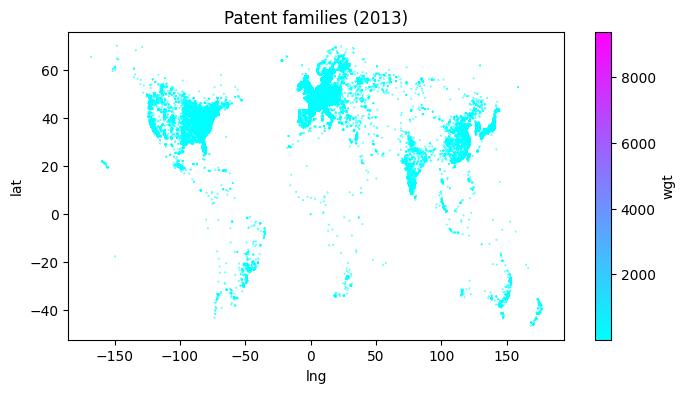

In [19]:
dfall[dfall['year']==2013].plot(x="lng", y="lat", kind="scatter", s=.1, figsize=[8,4], title='Patent families (2013)', c='wgt',colormap='cool')
# plt.savefig('plots/map_pats13/map_pats13.png')

### General & Time epsilon data

In [20]:
# Sample all pats in 2013
x = dfall[dfall['year']==2013]
# nearest neighbor (i.e. min distamce) distribution
nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree', metric='haversine').fit(x[['radlat','radlng']])
distances, idx = nn.kneighbors(x[['radlat','radlng']])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
distances_km=distances*r_km
distances_km

array([6.28682714e-04, 6.28682714e-04, 6.35183012e-04, ...,
       1.30940903e+03, 1.53791004e+03, 3.97487026e+03])

In [21]:
# Share of points in the same coordinates
wsame = x[x['wgt']>1].wgt.sum()/x.wgt.sum()
usame = x[x['wgt']>1].wgt.count()/x.wgt.count()
print('wgt same points share:', wsame, 'unwgt same points share:', usame)

wgt same points share: 0.7891990181811978 unwgt same points share: 0.3079034555610685


In [22]:
# plot dataframe
i = pd.DataFrame(distances_km).quantile(np.linspace(0,1,101))
i.rename(columns={0:'2013'}, inplace=True)

In [23]:
# Sample all pats in 2003
x = dfall[dfall['year']==2003]
# nearest neighbor (i.e. min distamce) distribution
nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree', metric='haversine').fit(x[['radlat','radlng']])
distances, idx = nn.kneighbors(x[['radlat','radlng']])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
distances_km=distances*r_km
distances_km

array([6.37615588e-04, 6.37615588e-04, 6.58036050e-04, ...,
       1.27549000e+03, 1.92358183e+03, 2.19652783e+03])

In [24]:
# Share of points in the same coordinates
wsame = x[x['wgt']>1].wgt.sum()/x.wgt.sum()
usame = x[x['wgt']>1].wgt.count()/x.wgt.count()
print('wgt same points share:', wsame, 'unwgt same points share:', usame)

wgt same points share: 0.6859115456053726 unwgt same points share: 0.24502895637874467


In [25]:
# add 3003 to plot dataframe
j = pd.DataFrame(distances_km).quantile(np.linspace(0,1,101))
j.rename(columns={0:'2003'}, inplace=True)
i = pd.concat([i,j], axis=1)

### Min distance (Epsilon) distribution over time

In [26]:
# !mkdir plots/disteps_pats0313

In [27]:
i.to_csv('plots/disteps_pats0313/disteps_pats0313.csv', index=True)

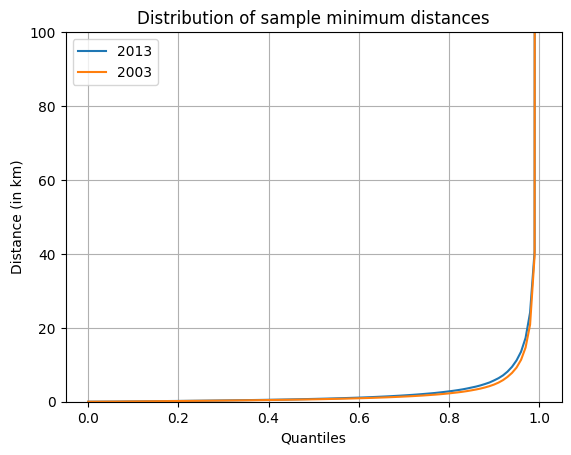

In [28]:
i.plot()
plt.title('Distribution of sample minimum distances')
plt.grid(True)
plt.xlabel('Quantiles')
plt.ylim((0,100))
plt.ylabel('Distance (in km)')
# plt.savefig('plots/disteps_pats0313/disteps_pats0313.png')
plt.show()

### 35 tecs Epsilon data 

In [29]:
x = df[df['year']==2013]
for t in x.tec.unique():
    z=x[x['tec']==t]
    wsame = z[z['wgt']>1].wgt.sum()/z.wgt.sum()
    usame = z[z['wgt']>1].wgt.count()/z.wgt.count()
    print(t,':', z.wgt.sum(), 'same pts, wgt:', wsame, 'unwgt:', usame)
    nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree', metric='haversine').fit(z[['radlat','radlng']])
    distances, idx = nn.kneighbors(z[['radlat','radlng']])
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    distances_km=distances*r_km
    distances_km
    j = pd.DataFrame(distances_km).quantile(np.linspace(0,1,101))
    j.rename(columns={0:str(t)}, inplace=True)
    i = pd.concat([i,j], axis=1)

3220 : 13954.0 same pts, wgt: 0.19671778701447615 unwgt: 0.06263589228968054
3324 : 10428.0 same pts, wgt: 0.189873417721519 unwgt: 0.06341463414634146
3419 : 19596.0 same pts, wgt: 0.21989181465605226 unwgt: 0.06883108972406651
4230 : 10872.0 same pts, wgt: 0.24374540103016923 unwgt: 0.07524462940051738
2113 : 31334.0 same pts, wgt: 0.3871194229910002 unwgt: 0.1397598996595592
0 : 18047.0 same pts, wgt: 0.4609630409486341 unwgt: 0.16598079561042525
5135 : 18715.0 same pts, wgt: 0.26310446166176865 unwgt: 0.09850960909922865
5233 : 12727.0 same pts, wgt: 0.26769859354129016 unwgt: 0.09135224724578336
2111 : 9905.0 same pts, wgt: 0.10065623422513882 unwgt: 0.035199826708545434
3114 : 19423.0 same pts, wgt: 0.23456726561293312 unwgt: 0.07852981281765216
3115 : 18689.0 same pts, wgt: 0.22510567713628338 unwgt: 0.07763836698299471
1101 : 42815.0 same pts, wgt: 0.4799019035384795 unwgt: 0.1419874388317343
1408 : 24454.0 same pts, wgt: 0.5130040075243314 unwgt: 0.13796597900832427
2110 : 314

### Min distance (epsilon) distribution over 35 tech fields

In [33]:
# !mkdir plots/disteps_pats35tecs

In [31]:
i.to_csv('plots/disteps_pats35tecs/disteps_pats35tecs.csv', index=True)

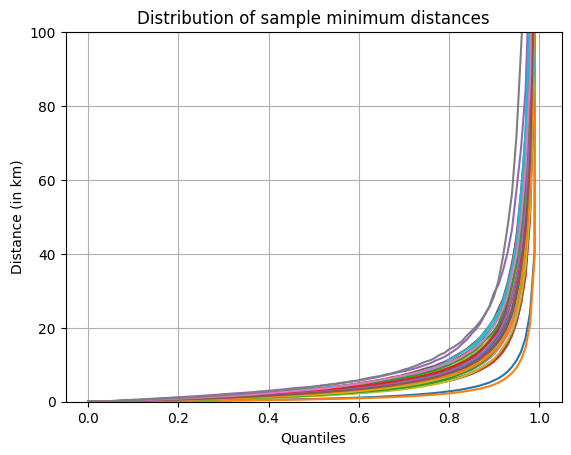

In [32]:
i.plot()
plt.title('Distribution of sample minimum distances')
plt.grid(True)
plt.xlabel('Quantiles')
plt.ylim((0,100))
plt.ylabel('Distance (in km)')
legend = plt.legend([])
legend.remove()
# plt.savefig('plots/disteps_pats35tecs/disteps_pats35tecs.png')
plt.show()

### 13 Subsectors epsilon data

In [36]:
df = pd.read_csv('ipf0313tec2.csv')
df.rename(columns={'tec2': 'tec'}, inplace=True)
df.head()

,year,lat,lng,tec,wgt,adminlat,adminlng,name,admin1,admin2,cc
0,2003,-46.40000,168.35001,14,0.250000,-46.40000,168.35000,Invercargill,Southland,Invercargill City,NZ
1,2003,-46.40000,168.35001,32,0.250000,-46.40000,168.35000,Invercargill,Southland,Invercargill City,NZ
2,2003,-46.23148,169.75117,34,0.500000,-46.23389,169.75000,Balclutha,Otago,Clutha District,NZ
3,2003,-46.23148,169.75117,41,0.500000,-46.23389,169.75000,Balclutha,Otago,Clutha District,NZ
4,2003,-46.13330,167.68300,42,0.333333,-46.35000,168.01667,Riverton,Southland,Southland District,NZ


In [37]:
dfall = df[['year','lat','lng','wgt']].groupby(['year','lat','lng'],as_index=False).sum()
dfall.head()

,year,lat,lng,wgt
0,2003,-46.40000,168.35001,0.500000
1,2003,-46.23148,169.75117,1.000000
2,2003,-46.13330,167.68300,0.333333
3,2003,-46.09880,168.94600,0.333333
4,2003,-46.08330,168.05000,0.333333


In [38]:
dfcc = df[['year','lat','lng','cc','wgt']].groupby(['year','lat','lng','cc'],as_index=False).sum()
dfcc.head()

,year,lat,lng,cc,wgt
0,2003,-46.40000,168.35001,NZ,0.500000
1,2003,-46.23148,169.75117,NZ,1.000000
2,2003,-46.13330,167.68300,NZ,0.333333
3,2003,-46.09880,168.94600,NZ,0.333333
4,2003,-46.08330,168.05000,NZ,0.333333


In [39]:
for x in df, dfall, dfcc:
    # round up wgts
    x['wgt']=x['wgt'].apply(np.ceil)
    # convert coords to radians 
    x['radlat']=np.deg2rad(x['lat'].values)
    x['radlng']=np.deg2rad(x['lng'].values)
    print(x.head())
    print('total wgts:', x.wgt.sum())
    # print('unwgt stats:', x.describe())

   year       lat        lng  tec  wgt  adminlat   adminlng          name  \
0  2003 -46.40000  168.35001   14  1.0 -46.40000  168.35000  Invercargill   
1  2003 -46.40000  168.35001   32  1.0 -46.40000  168.35000  Invercargill   
2  2003 -46.23148  169.75117   34  1.0 -46.23389  169.75000     Balclutha   
3  2003 -46.23148  169.75117   41  1.0 -46.23389  169.75000     Balclutha   
4  2003 -46.13330  167.68300   42  1.0 -46.35000  168.01667      Riverton   

      admin1              admin2  cc    radlat    radlng  
0  Southland   Invercargill City  NZ -0.809833  2.938262  
1  Southland   Invercargill City  NZ -0.809833  2.938262  
2      Otago     Clutha District  NZ -0.806892  2.962717  
3      Otago     Clutha District  NZ -0.806892  2.962717  
4  Southland  Southland District  NZ -0.805178  2.926620  
total wgts: 1037548.0
   year       lat        lng  wgt    radlat    radlng
0  2003 -46.40000  168.35001  1.0 -0.809833  2.938262
1  2003 -46.23148  169.75117  1.0 -0.806892  2.962717

In [40]:
x = dfall[dfall['year']==2013]
nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree', metric='haversine').fit(x[['radlat','radlng']])
distances, idx = nn.kneighbors(x[['radlat','radlng']])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
distances_km=distances*r_km
distances_km

array([6.28682714e-04, 6.28682714e-04, 6.35183012e-04, ...,
       1.30940903e+03, 1.53791004e+03, 3.97487026e+03])

In [41]:
# Share of points in the same coordinates
wsame = x[x['wgt']>1].wgt.sum()/x.wgt.sum()
usame = x[x['wgt']>1].wgt.count()/x.wgt.count()
print('wgt same points share:', wsame, 'unwgt same points share:', usame)

wgt same points share: 0.7892095571658027 unwgt same points share: 0.3078874501832616


In [42]:
i = pd.DataFrame(distances_km).quantile(np.linspace(0,1,101))
i.rename(columns={0:'2013'}, inplace=True)

In [43]:
x = dfall[dfall['year']==2003]
nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree', metric='haversine').fit(x[['radlat','radlng']])
distances, idx = nn.kneighbors(x[['radlat','radlng']])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
distances_km=distances*r_km
distances_km

array([6.37615588e-04, 6.37615588e-04, 6.58036050e-04, ...,
       1.27549000e+03, 1.92358183e+03, 2.19652783e+03])

In [44]:
# Share of points in the same coordinates
wsame = x[x['wgt']>1].wgt.sum()/x.wgt.sum()
usame = x[x['wgt']>1].wgt.count()/x.wgt.count()
print('wgt same points share:', wsame, 'unwgt same points share:', usame)

wgt same points share: 0.6859484467944481 unwgt same points share: 0.24505278878923412


In [45]:
j = pd.DataFrame(distances_km).quantile(np.linspace(0,1,101))
j.rename(columns={0:'2003'}, inplace=True)
i = pd.concat([i,j], axis=1)

### Min distance (Epsilon) distribution over time

In [46]:
!mkdir plots/disteps_pats0313_13tecs

In [47]:
i.to_csv('plots/disteps_pats0313_13tecs/disteps_pats0313_13tecs.csv', index=True)

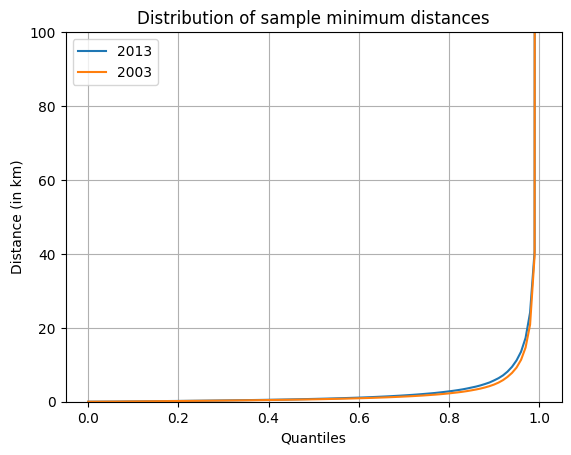

In [48]:
i.plot()
plt.title('Distribution of sample minimum distances')
plt.grid(True)
plt.xlabel('Quantiles')
plt.ylim((0,100))
plt.ylabel('Distance (in km)')
# plt.savefig('plots/disteps_pats0313_13tecs/disteps_pats0313_13tecs.png')
plt.show()

### 13 tecs, i.e. subsectors 

In [49]:
x = df[df['year']==2013]
print(x.tec.unique())

[32 33 34 42 21  0 51 52 31 11 14 41 13 12]


In [50]:
# x = df[df['year']==2013]
for t in 11,12,13,14,21,31,32,33,34,41,42,51,52 :
    z=x[x['tec']==t]
    wsame = z[z['wgt']>1].wgt.sum()/z.wgt.sum()
    usame = z[z['wgt']>1].wgt.count()/z.wgt.count()
    print(t,':', z.wgt.sum(), 'same pts, wgt:', wsame, 'unwgt:', usame)
    nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree', metric='haversine').fit(z[['radlat','radlng']])
    distances, idx = nn.kneighbors(z[['radlat','radlng']])
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    distances_km=distances*r_km
    distances_km
    j = pd.DataFrame(distances_km).quantile(np.linspace(0,1,101))
    j.rename(columns={0:str(t)}, inplace=True)
    i = pd.concat([i,j], axis=1)

11 : 42815.0 same pts, wgt: 0.4799019035384795 unwgt: 0.1419874388317343
12 : 26067.0 same pts, wgt: 0.43595350443088965 unwgt: 0.11052631578947368
13 : 96768.0 same pts, wgt: 0.6802455357142857 unwgt: 0.21279194016180736
14 : 41140.0 same pts, wgt: 0.5685464268351968 unwgt: 0.14716763561235766
21 : 69541.0 same pts, wgt: 0.4568815518902518 unwgt: 0.1567160846655354
31 : 48375.0 same pts, wgt: 0.45965891472868214 unwgt: 0.16395330241484088
32 : 27517.0 same pts, wgt: 0.27753752225896716 unwgt: 0.0861030662437365
33 : 24990.0 same pts, wgt: 0.24873949579831933 unwgt: 0.08455236980690463
34 : 41979.0 same pts, wgt: 0.3528907310798256 unwgt: 0.11503127443315089
41 : 35786.0 same pts, wgt: 0.36142625607779577 unwgt: 0.11590838749613123
42 : 65124.0 same pts, wgt: 0.4902954363982556 unwgt: 0.16786161945349712
51 : 18715.0 same pts, wgt: 0.26310446166176865 unwgt: 0.09850960909922865
52 : 23280.0 same pts, wgt: 0.3375429553264605 unwgt: 0.11004674245484448


### Min distance (epsilon) distribution over 13 subsector fields

In [52]:
# !mkdir plots/disteps_pats13tecs

In [53]:
i.to_csv('plots/disteps_pats13tecs/disteps_pats13tecs.csv', index=True)

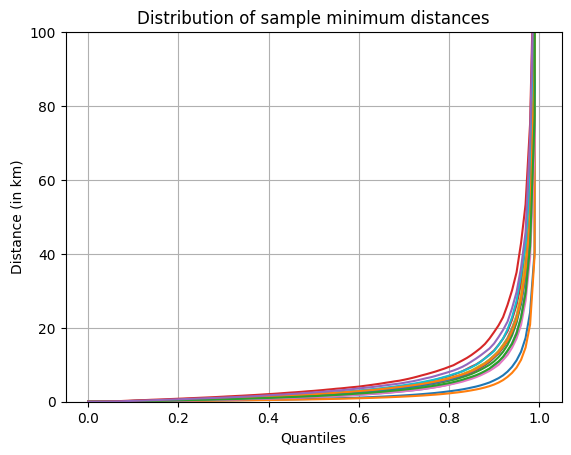

In [54]:
i.plot()
plt.title('Distribution of sample minimum distances')
plt.grid(True)
plt.xlabel('Quantiles')
plt.ylim((0,100))
plt.ylabel('Distance (in km)')
legend = plt.legend([])
legend.remove()
# plt.savefig('plots/disteps_pats13tecs/disteps_pats13tecs.png')
plt.show()

### Country epsilon data (13 tecs & CC)

In [68]:
x = dfcc[dfcc['year']==2013]
cclist = {'AR','AU','BR','CN','DE','FR','GB','JP','MX', 'SG', 'US','ZA'}
for t in cclist:
    z=x[x['cc']==t].copy()
    wsame = z[z['wgt']>1].wgt.sum()/z.wgt.sum()
    usame = z[z['wgt']>1].wgt.count()/z.wgt.count()
    print(t,'points: wgt=', z.wgt.sum(),', unwgt=', z.wgt.count(), '; pts in same coords: wgt=', wsame, ', unwgt=', usame)
    nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree', metric='haversine').fit(z[['radlat','radlng']])
    distances, idx = nn.kneighbors(z[['radlat','radlng']])
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    distances_km=distances*r_km
    z['dist']=distances_km.tolist()
    z['distwgt'] = np.where(z['wgt']>1, 0, z['dist'])
    cur = pd.DataFrame(z['dist'].quantile(np.linspace(0,1,101)))
    curwgt = pd.DataFrame(z['distwgt'].quantile(np.linspace(0,1,101)))
    # cur = pd.DataFrame(distances_km).quantile(np.linspace(0,1,101))
    cur.rename(columns={'dist':str(t)}, inplace=True)
    curwgt.rename(columns={'distwgt':str(t)}, inplace=True)
    try:
        tmp = pd.concat([tmp,cur], axis=1)
        tmpwgt = pd.concat([tmpwgt,curwgt], axis=1)
    except:
        tmp = cur
        tmpwgt = curwgt

ccplot = tmp
ccplotwgt = tmpwgt
del tmp
del tmpwgt

JP points: wgt= 88031.0 , unwgt= 10521 ; pts in same coords: wgt= 0.9340573207165658 , unwgt= 0.4482463644140291
BR points: wgt= 1497.0 , unwgt= 1299 ; pts in same coords: wgt= 0.19305277221108885 , unwgt= 0.07005388760585066
AR points: wgt= 118.0 , unwgt= 98 ; pts in same coords: wgt= 0.23728813559322035 , unwgt= 0.08163265306122448
MX points: wgt= 568.0 , unwgt= 444 ; pts in same coords: wgt= 0.3221830985915493 , unwgt= 0.13288288288288289
ZA points: wgt= 484.0 , unwgt= 187 ; pts in same coords: wgt= 0.78099173553719 , unwgt= 0.43315508021390375
FR points: wgt= 15232.0 , unwgt= 9382 ; pts in same coords: wgt= 0.5238314075630253 , unwgt= 0.22692389682370498
DE points: wgt= 39669.0 , unwgt= 19638 ; pts in same coords: wgt= 0.6468274975421614 , unwgt= 0.28658722884204096
SG points: wgt= 921.0 , unwgt= 380 ; pts in same coords: wgt= 0.6579804560260586 , unwgt= 0.17105263157894737
AU points: wgt= 2869.0 , unwgt= 1555 ; pts in same coords: wgt= 0.6472638550017428 , unwgt= 0.349196141479099

In [69]:
print(ccplot.head())
print(ccplotwgt.head())

            JP        BR        AR        MX        ZA        FR        DE  \
0.00  0.001434  0.002226  0.270684  0.094722  0.011132  0.000732  0.000662   
0.01  0.010033  0.011132  0.270684  0.115793  0.013999  0.003232  0.011132   
0.02  0.013054  0.019513  0.304494  0.259463  0.060607  0.011883  0.027295   
0.03  0.017212  0.030208  0.306652  0.387491  0.108499  0.031374  0.045157   
0.04  0.021069  0.042818  0.355000  0.519018  0.166322  0.044823  0.063963   

            SG        AU        GB        US        CN  
0.00  0.051400  0.004871  0.000629  0.001113  0.000803  
0.01  0.056313  0.025526  0.003473  0.008248  0.011132  
0.02  0.060251  0.027286  0.011324  0.011132  0.029026  
0.03  0.064871  0.028643  0.019624  0.013828  0.061289  
0.04  0.066055  0.035859  0.026404  0.014471  0.095795  
       JP   BR   AR   MX   ZA   FR   DE   SG   AU   GB   US   CN
0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
0.01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

### Min distance (epsilon) distribution over countries (13 subsector fields)

In [70]:
# !mkdir plots/disteps_patsCC

In [71]:
ccplot.to_csv('plots/disteps_patsCC/disteps_patsCC.csv', index=True)
ccplotwgt.to_csv('plots/disteps_patsCC/disteps_patsCCwgt.csv', index=True)

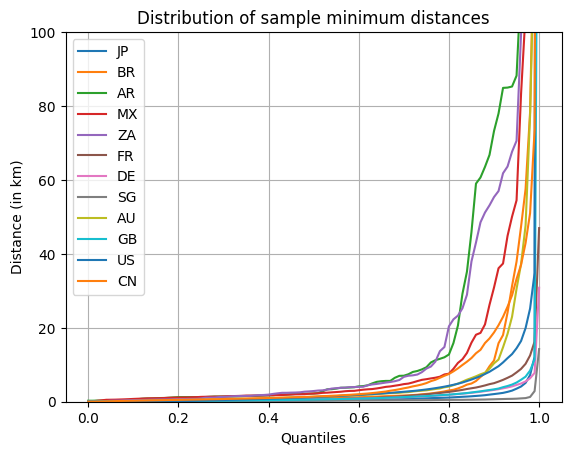

In [72]:
ccplot.plot()
plt.title('Distribution of sample minimum distances')
plt.grid(True)
plt.xlabel('Quantiles')
plt.ylim((0,100))
plt.ylabel('Distance (in km)')
# plt.savefig('plots/disteps_patsCC/disteps_patsCC.png')
# plt.savefig('plots/resubmission/fig2c_eps_cc.png')
plt.show()

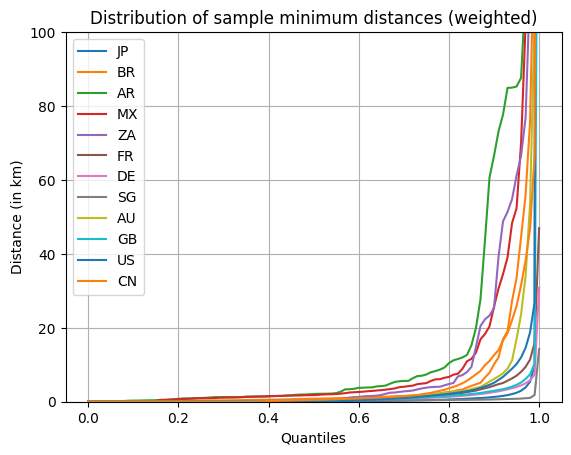

In [73]:
ccplotwgt.plot()
plt.title('Distribution of sample minimum distances (weighted)')
plt.grid(True)
plt.xlabel('Quantiles')
plt.ylim((0,100))
plt.ylabel('Distance (in km)')
# plt.savefig('plots/disteps_patsCC/disteps_patsCCwgt.png')
plt.show()

## Pubs

In [78]:
df = pd.read_csv('isp0313.csv')
df.head()

,year,lat,lng,tec,wgt,adminlat,adminlng,name,admin1,admin2,cc
0,2003,-54.8,-68.3,1,3.500000,-54.8,-68.3,Ushuaia,Tierra del Fuego,NaN,AR
1,2003,-54.8,-68.3,2,0.250000,-54.8,-68.3,Ushuaia,Tierra del Fuego,NaN,AR
2,2003,-54.8,-68.3,4,0.500000,-54.8,-68.3,Ushuaia,Tierra del Fuego,NaN,AR
3,2003,-54.8,-68.3,5,3.845238,-54.8,-68.3,Ushuaia,Tierra del Fuego,NaN,AR
4,2003,-54.8,-68.3,7,0.250000,-54.8,-68.3,Ushuaia,Tierra del Fuego,NaN,AR


In [79]:
dfall = df[['year','lat','lng','wgt']].groupby(['year','lat','lng'],as_index=False).sum()
dfall.head()

,year,lat,lng,wgt
0,2003,-54.80000,-68.30000,8.345238
1,2003,-53.15483,-70.91129,3.111111
2,2003,-51.62261,-69.21813,1.333333
3,2003,-51.39400,-70.60550,4.250000
4,2003,-47.75034,-65.89382,0.333333


In [80]:
dfcc = df[['year','lat','lng','cc','wgt']].groupby(['year','lat','lng','cc'],as_index=False).sum()
dfcc.head()

,year,lat,lng,cc,wgt
0,2003,-54.80000,-68.30000,AR,8.345238
1,2003,-53.15483,-70.91129,CL,3.111111
2,2003,-51.62261,-69.21813,AR,1.333333
3,2003,-51.39400,-70.60550,AR,4.250000
4,2003,-47.75034,-65.89382,AR,0.333333


In [81]:
for x in df, dfall, dfcc:
    # round up wgts
    x['wgt']=x['wgt'].apply(np.ceil)
    # convert coords to radians 
    x['radlat']=np.deg2rad(x['lat'].values)
    x['radlng']=np.deg2rad(x['lng'].values)
    print(x.head())
    print('total wgts:', x.wgt.sum())
    # print('unwgt stats:', x.describe())

   year   lat   lng  tec  wgt  adminlat  adminlng     name            admin1  \
0  2003 -54.8 -68.3    1  4.0     -54.8     -68.3  Ushuaia  Tierra del Fuego   
1  2003 -54.8 -68.3    2  1.0     -54.8     -68.3  Ushuaia  Tierra del Fuego   
2  2003 -54.8 -68.3    4  1.0     -54.8     -68.3  Ushuaia  Tierra del Fuego   
3  2003 -54.8 -68.3    5  4.0     -54.8     -68.3  Ushuaia  Tierra del Fuego   
4  2003 -54.8 -68.3    7  1.0     -54.8     -68.3  Ushuaia  Tierra del Fuego   

  admin2  cc   radlat   radlng  
0    NaN  AR -0.95644 -1.19206  
1    NaN  AR -0.95644 -1.19206  
2    NaN  AR -0.95644 -1.19206  
3    NaN  AR -0.95644 -1.19206  
4    NaN  AR -0.95644 -1.19206  
total wgts: 2585321.0
   year       lat       lng  wgt    radlat    radlng
0  2003 -54.80000 -68.30000  9.0 -0.956440 -1.192060
1  2003 -53.15483 -70.91129  4.0 -0.927727 -1.237635
2  2003 -51.62261 -69.21813  2.0 -0.900985 -1.208084
3  2003 -51.39400 -70.60550  5.0 -0.896995 -1.232298
4  2003 -47.75034 -65.89382  1.0 -

### Map plot 2003 sci pubs

In [83]:
# !mkdir plots/map_pubs03

In [84]:
dfall[dfall['year']==2003].to_csv('plots/map_pubs03/map_pubs03.csv', index=False)

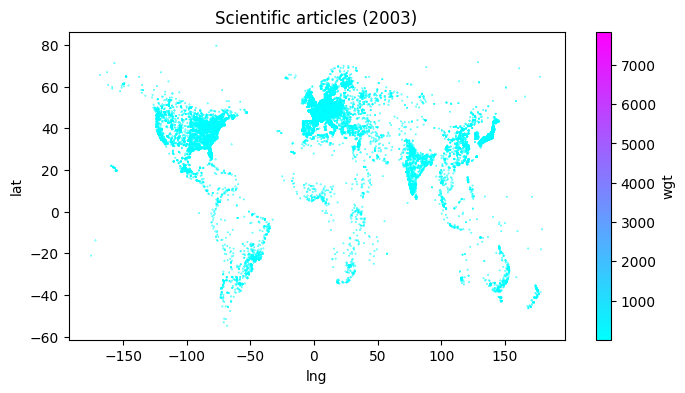

In [85]:
dfall[dfall['year']==2003].plot(x="lng", y="lat", kind="scatter", s=.1, figsize=[8,4], title='Scientific articles (2003)', c='wgt',colormap='cool')
# plt.savefig('plots/map_pubs03/map_pubs03.png')

### Map plot 2013 sci pubs

In [87]:
# !mkdir plots/map_pubs13

In [88]:
dfall[dfall['year']==2013].to_csv('plots/map_pubs13/map_pubs13.csv', index=False)

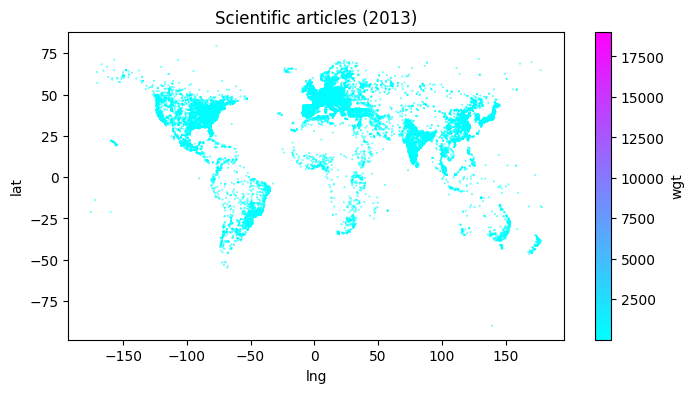

In [89]:
dfall[dfall['year']==2013].plot(x="lng", y="lat", kind="scatter", s=.1, figsize=[8,4], title='Scientific articles (2013)', c='wgt',colormap='cool')
# plt.savefig('plots/map_pubs13/map_pubs13.png')

### General & Time epsilon data

In [95]:
x = dfall[dfall['year']==2013]
nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree', metric='haversine').fit(x[['radlat','radlng']])
distances, idx = nn.kneighbors(x[['radlat','radlng']])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
distances_km=distances*r_km
distances_km

array([6.21120888e-04, 6.21120888e-04, 6.46660160e-04, ...,
       1.51358318e+03, 1.75524193e+03, 3.91868290e+03])

In [96]:
# Share of points in the same coordinates
wsame = x[x['wgt']>1].wgt.sum()/x.wgt.sum()
usame = x[x['wgt']>1].wgt.count()/x.wgt.count()
print('wgt same points share:', wsame, 'unwgt same points share:', usame)

wgt same points share: 0.9865857395636658 unwgt same points share: 0.5503744118751519


In [97]:
i = pd.DataFrame(distances_km).quantile(np.linspace(0,1,101))
i.rename(columns={0:'2013'}, inplace=True)

In [98]:
x = dfall[dfall['year']==2003]
nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree', metric='haversine').fit(x[['radlat','radlng']])
distances, idx = nn.kneighbors(x[['radlat','radlng']])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
distances_km=distances*r_km
distances_km

array([4.29947093e-04, 4.29947093e-04, 6.21120888e-04, ...,
       1.42066947e+03, 1.90011239e+03, 1.94240481e+03])

In [99]:
# Share of points in the same coordinates
wsame = x[x['wgt']>1].wgt.sum()/x.wgt.sum()
usame = x[x['wgt']>1].wgt.count()/x.wgt.count()
print('wgt same points share:', wsame, 'unwgt same points share:', usame)

wgt same points share: 0.983704985629837 unwgt same points share: 0.5561968316950732


In [100]:
j = pd.DataFrame(distances_km).quantile(np.linspace(0,1,101))
j.rename(columns={0:'2003'}, inplace=True)
i = pd.concat([i,j], axis=1)

### Min distance (Epsilon) distribution over time

In [102]:
# !mkdir plots/disteps_pubs0313

In [104]:
i.to_csv('plots/disteps_pubs0313/disteps_pubs0313.csv', index=True)

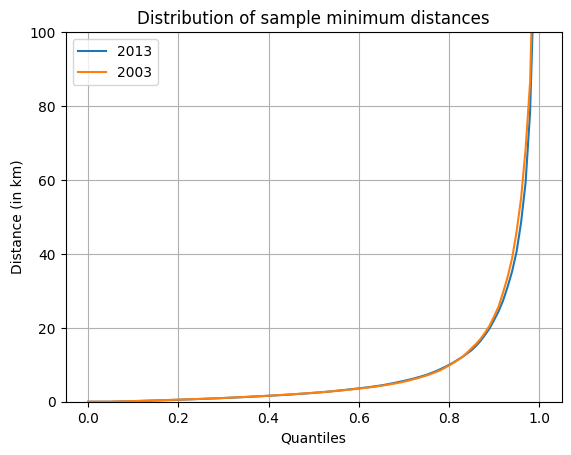

In [105]:
i.plot()
plt.title('Distribution of sample minimum distances')
plt.grid(True)
plt.xlabel('Quantiles')
plt.ylim((0,100))
plt.ylabel('Distance (in km)')
plt.savefig('plots/disteps_pubs0313/disteps_pubs0313.png')
plt.show()

## Sci fields (12) fig 2 right

In [18]:
x = df[df['year']==2013]
for t in 1,2,3,4,5,6,7,8,9,10,11,12:
    z=x[x['tec']==t]
    wsame = z[z['wgt']>1].wgt.sum()/z.wgt.sum()
    usame = z[z['wgt']>1].wgt.count()/z.wgt.count()
    print(t,':', z.wgt.sum(), 'same pts, wgt:', wsame, 'unwgt:', usame)
    nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree', metric='haversine').fit(z[['radlat','radlng']])
    distances, idx = nn.kneighbors(z[['radlat','radlng']])
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    distances_km=distances*r_km
    distances_km
    j = pd.DataFrame(distances_km).quantile(np.linspace(0,1,101))
    j.rename(columns={0:str(t)}, inplace=True)
    i = pd.concat([i,j], axis=1)

1 : 123070.0 same pts, wgt: 0.9001300073129114 unwgt: 0.3957227138643068
2 : 120726.0 same pts, wgt: 0.9121978695558538 unwgt: 0.39010356731875717
3 : 205390.0 same pts, wgt: 0.9500559910414333 unwgt: 0.43804097732003944
4 : 199489.0 same pts, wgt: 0.9398463073151904 unwgt: 0.4189143382887027
5 : 105508.0 same pts, wgt: 0.8978750426507942 unwgt: 0.3677014259726542
6 : 134676.0 same pts, wgt: 0.9176467967566604 unwgt: 0.38383333333333336
7 : 110375.0 same pts, wgt: 0.8978844847112117 unwgt: 0.3636158319688329
8 : 120386.0 same pts, wgt: 0.9191434219925905 unwgt: 0.3955538996522603
9 : 165613.0 same pts, wgt: 0.9551544866646942 unwgt: 0.4593040186371578
10 : 110002.0 same pts, wgt: 0.8880383993018309 unwgt: 0.3680213464696223
11 : 121428.0 same pts, wgt: 0.9331373324109761 unwgt: 0.4316017922150658
12 : 100163.0 same pts, wgt: 0.8935235566027375 unwgt: 0.35406698564593303


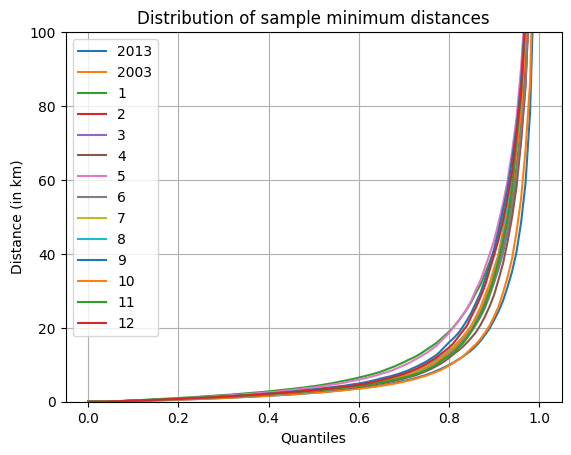

In [20]:
i.plot()
plt.title('Distribution of sample minimum distances')
plt.grid(True)
plt.xlabel('Quantiles')
plt.ylim((0,100))
plt.ylabel('Distance (in km)')
plt.savefig('plots/fig2b_eps_pubs_time_tec.png')
plt.show()

## CC

In [21]:
x = dfcc[dfcc['year']==2013]
for t in 'AR','AU','BR','CN','DE','FR','GB','JP', 'MX', 'SG', 'US','ZA':
    z=x[x['cc']==t]
    wsame = z[z['wgt']>1].wgt.sum()/z.wgt.sum()
    usame = z[z['wgt']>1].wgt.count()/z.wgt.count()
    print(t,'points: wgt=', z.wgt.sum(),', unwgt=', z.wgt.count(), '; pts in same coords: wgt=', wsame, ', unwgt=', usame)
    nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree', metric='haversine').fit(z[['radlat','radlng']])
    distances, idx = nn.kneighbors(z[['radlat','radlng']])
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    distances_km=distances*r_km
    z['dist']=distances_km.tolist()
    z['distwgt'] = np.where(z['wgt']>1, 0, z['dist'])
    cur = pd.DataFrame(z['dist'].quantile(np.linspace(0,1,101)))
    curwgt = pd.DataFrame(z['distwgt'].quantile(np.linspace(0,1,101)))
    # cur = pd.DataFrame(distances_km).quantile(np.linspace(0,1,101))
    cur.rename(columns={'dist':str(t)}, inplace=True)
    curwgt.rename(columns={'distwgt':str(t)}, inplace=True)
    try:
        tmp = pd.concat([tmp,cur], axis=1)
        tmpwgt = pd.concat([tmpwgt,curwgt], axis=1)
    except:
        tmp = cur
        tmpwgt = curwgt

ccplot = tmp
ccplotwgt = tmpwgt
del tmp
del tmpwgt

AR points: wgt= 7131.0 , unwgt= 249 ; pts in same coords: wgt= 0.9862571869303043 , unwgt= 0.606425702811245
AU points: wgt= 35998.0 , unwgt= 1004 ; pts in same coords: wgt= 0.9870826157008723 , unwgt= 0.5368525896414342
BR points: wgt= 35581.0 , unwgt= 1272 ; pts in same coords: wgt= 0.9827717039993255 , unwgt= 0.5180817610062893
CN points: wgt= 189832.0 , unwgt= 2672 ; pts in same coords: wgt= 0.9953221796114459 , unwgt= 0.6676646706586826


/tmp/ipykernel_899583/2847395708.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['dist']=distances_km.tolist()
/tmp/ipykernel_899583/2847395708.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['distwgt'] = np.where(z['wgt']>1, 0, z['dist'])
/tmp/ipykernel_899583/2847395708.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

DE points: wgt= 73310.0 , unwgt= 2627 ; pts in same coords: wgt= 0.9851043513845315 , unwgt= 0.5843167110772745
FR points: wgt= 51637.0 , unwgt= 1617 ; pts in same coords: wgt= 0.9844878672269884 , unwgt= 0.5046382189239332
GB points: wgt= 75323.0 , unwgt= 4956 ; pts in same coords: wgt= 0.9610079258659374 , unwgt= 0.40738498789346245


/tmp/ipykernel_899583/2847395708.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['dist']=distances_km.tolist()
/tmp/ipykernel_899583/2847395708.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['distwgt'] = np.where(z['wgt']>1, 0, z['dist'])
/tmp/ipykernel_899583/2847395708.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

JP points: wgt= 78523.0 , unwgt= 4155 ; pts in same coords: wgt= 0.9729506004610115 , unwgt= 0.4888086642599278
MX points: wgt= 9499.0 , unwgt= 862 ; pts in same coords: wgt= 0.9548373513001368 , unwgt= 0.5023201856148491


/tmp/ipykernel_899583/2847395708.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['dist']=distances_km.tolist()
/tmp/ipykernel_899583/2847395708.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['distwgt'] = np.where(z['wgt']>1, 0, z['dist'])
/tmp/ipykernel_899583/2847395708.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

SG points: wgt= 5869.0 , unwgt= 61 ; pts in same coords: wgt= 0.9964218776622934 , unwgt= 0.6557377049180327
US points: wgt= 351651.0 , unwgt= 9584 ; pts in same coords: wgt= 0.9892080500268733 , unwgt= 0.6040275459098498
ZA points: wgt= 6257.0 , unwgt= 196 ; pts in same coords: wgt= 0.9843375419530126 , unwgt= 0.5


/tmp/ipykernel_899583/2847395708.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['dist']=distances_km.tolist()
/tmp/ipykernel_899583/2847395708.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['distwgt'] = np.where(z['wgt']>1, 0, z['dist'])
/tmp/ipykernel_899583/2847395708.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [22]:
print(ccplot.head())
print(ccplotwgt.head())

            AR        AU        BR        CN        DE        FR        GB  \
0.00  0.004282  0.001416  0.037869  0.001113  0.000647  0.000733  0.000664   
0.01  0.005491  0.002644  0.108709  0.108341  0.001402  0.001365  0.017254   
0.02  0.201001  0.003340  0.222531  0.196050  0.002326  0.001851  0.029499   
0.03  0.492640  0.004287  0.314102  0.272907  0.002492  0.002196  0.035005   
0.04  0.597519  0.004846  0.363950  0.325193  0.003044  0.002245  0.040783   

            JP        MX        SG        US        ZA  
0.00  0.000907  0.002392  0.052781  0.000813  0.003340  
0.01  0.004283  0.005333  0.052781  0.002730  0.010742  
0.02  0.005850  0.147026  0.055460  0.003461  0.014132  
0.03  0.060474  0.337680  0.063500  0.004394  0.068938  
0.04  0.105901  0.425940  0.066180  0.005132  0.185560  
       AR   AU   BR   CN   DE   FR   GB   JP   MX   SG   US   ZA
0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
0.01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

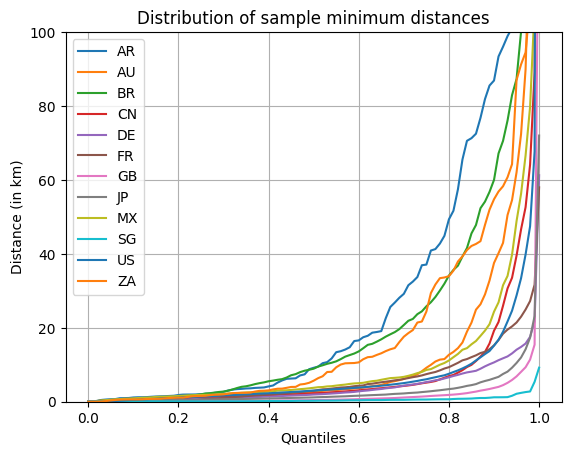

In [23]:
ccplot.plot()
plt.title('Distribution of sample minimum distances')
plt.grid(True)
plt.xlabel('Quantiles')
plt.ylim((0,100))
plt.ylabel('Distance (in km)')
plt.savefig('plots/fig2d_eps_cc.png')
plt.show()

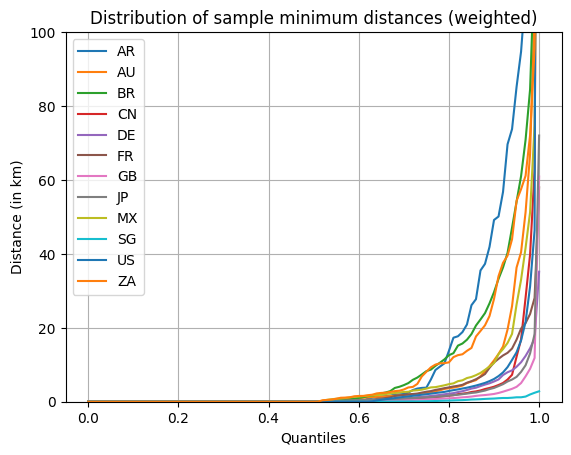

In [24]:
ccplotwgt.plot()
plt.title('Distribution of sample minimum distances (weighted)')
plt.grid(True)
plt.xlabel('Quantiles')
plt.ylim((0,100))
plt.ylabel('Distance (in km)')
plt.savefig('plots/fig2d_eps_cc_wgt.png')
plt.show()